The notebook explores Sperantov's data on tragedies.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import matrix_rank
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kruskal
import itertools
from scipy.stats import mannwhitneyu
import numpy as np

In [2]:
sperantov_data = pd.read_csv('sperantov_raw_data.txt', sep='\t')

In [3]:
sperantov_data.head()

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,лексическое разнообразие,характерологические ремарки
0,Conservative Neoclassicism,"Сумароков, «Хорев», 1747",5,2.57,3.41,0.44,0.35,0.00
1,Moderate Neoclassicism,"Сумароков, «Гамлет», 1748",1,2.69,3.54,0.51,0.40,5.40
2,Conservative Neoclassicism,"Сумароков, «Синав и Трувор», 1750",5,4.19,2.75,0.63,0.28,3.12
3,Conservative Neoclassicism,"Сумароков, «Аргистона», 1750",5,2.59,3.47,0.20,0.24,2.63
4,Conservative Neoclassicism,"Ломоносов, «Тамира и Селим», 1750",5,3.32,2.98,0.25,0.21,0.00


In [4]:
sperantov_data.shape

(70, 8)

In [5]:
sperantov_data['Актность'].unique()

array(['5', '1', '3', '5, after Voltaire', '5, with chorus',
       '4 scenes, with choruses', '3, with choruses and balets',
       '5 acts, with choruses', '5, with choruses',
       '5, after Shakespeare', '5, immitation of Lemierre',
       '5, immitation of Euripides'], dtype=object)

In [6]:
sperantov_data['author'] = sperantov_data['Произведение'].apply(lambda x: x.split(', ')[0])
sperantov_data['tragedy_title'] = sperantov_data['Произведение'].apply(lambda x: x.split(', ')[1])
sperantov_data['year'] = sperantov_data['Произведение'].apply(lambda x: x.split(', ')[2])

In [7]:
# remove tragedies which are not five acts or are translations/ immitations
sperantov_data = sperantov_data[sperantov_data['Актность']=='5'].copy()

In [8]:
sperantov_data.columns = [col.strip() for col in sperantov_data.columns]

In [9]:
sperantov_data.head()

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,лексическое разнообразие,характерологические ремарки,author,tragedy_title,year
0,Conservative Neoclassicism,"Сумароков, «Хорев», 1747",5,2.57,3.41,0.44,0.35,0.00,Сумароков,«Хорев»,1747
2,Conservative Neoclassicism,"Сумароков, «Синав и Трувор», 1750",5,4.19,2.75,0.63,0.28,3.12,Сумароков,«Синав и Трувор»,1750
3,Conservative Neoclassicism,"Сумароков, «Аргистона», 1750",5,2.59,3.47,0.20,0.24,2.63,Сумароков,«Аргистона»,1750
4,Conservative Neoclassicism,"Ломоносов, «Тамира и Селим», 1750",5,3.32,2.98,0.25,0.21,0.00,Ломоносов,«Тамира и Селим»,1750
5,Non_Classified,"Тредиаковский, «Деидамия», 1750",5,6.82,4.88,1.04,0.28,9.24,Тредиаковский,«Деидамия»,1750


In [10]:
sperantov_data.corr()

,частотность,протяженность,внутристиховые ремарки,лексическое разнообразие,характерологические ремарки
частотность,1.000000,0.476894,0.857427,-0.076559,0.714563
протяженность,0.476894,1.000000,0.415604,0.193884,0.404546
внутристиховые ремарки,0.857427,0.415604,1.000000,0.012556,0.822918
лексическое разнообразие,-0.076559,0.193884,0.012556,1.000000,0.124856
характерологические ремарки,0.714563,0.404546,0.822918,0.124856,1.000000


In [11]:
numeric = sperantov_data.iloc[:, 3:-3].copy()

In [12]:
numeric.shape

(55, 5)

In [13]:
# bring the data to scale
scaler = MinMaxScaler()
rescaled_numeric = scaler.fit_transform(numeric)

In [14]:
rescaled_numeric.shape

(55, 5)

In [15]:
sperantov_data.iloc[:, 3:-3] = rescaled_numeric

In [16]:
sperantov_data.head()

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,лексическое разнообразие,характерологические ремарки,author,tragedy_title,year
0,Conservative Neoclassicism,"Сумароков, «Хорев», 1747",5,0.056589,0.229167,0.052811,0.642857,0.000000,Сумароков,«Хорев»,1747
2,Conservative Neoclassicism,"Сумароков, «Синав и Трувор», 1750",5,0.122070,0.076389,0.085179,0.392857,0.124303,Сумароков,«Синав и Трувор»,1750
3,Conservative Neoclassicism,"Сумароков, «Аргистона», 1750",5,0.057397,0.243056,0.011925,0.250000,0.104781,Сумароков,«Аргистона»,1750
4,Conservative Neoclassicism,"Ломоносов, «Тамира и Селим», 1750",5,0.086904,0.129630,0.020443,0.142857,0.000000,Ломоносов,«Тамира и Селим»,1750
5,Non_Classified,"Тредиаковский, «Деидамия», 1750",5,0.228375,0.569444,0.155026,0.392857,0.368127,Тредиаковский,«Деидамия»,1750


In [17]:
sperantov_data.corr()

,частотность,протяженность,внутристиховые ремарки,лексическое разнообразие,характерологические ремарки
частотность,1.000000,0.476894,0.857427,-0.076559,0.714563
протяженность,0.476894,1.000000,0.415604,0.193884,0.404546
внутристиховые ремарки,0.857427,0.415604,1.000000,0.012556,0.822918
лексическое разнообразие,-0.076559,0.193884,0.012556,1.000000,0.124856
характерологические ремарки,0.714563,0.404546,0.822918,0.124856,1.000000


In [18]:
sperantov_data.year.unique()

array(['1747', '1750', '1751', '1758', '1762', '1767', '1768', '1769',
       '1771', '1772', '1773', '1774', 'середина 1770-х', '1779', '1780',
       '1781', '1782', '1784', '1785', '1786', 'около 1787', '1787',
       '1789', '1794', '1798', '1804', '1806', '1807', '1808',
       '1808—1809', '1809', '1810', '1811', '1814', '1815', '1822'],
      dtype=object)

In [19]:
sperantov_data[(sperantov_data.year=='середина 1770-х')].index[0]

23

In [20]:
# since we are mainly interested in different periods, we will update the years so that they remain in the same period,
# but are easier to convert to numeric data format  
sperantov_data.loc[sperantov_data[sperantov_data.year=='середина 1770-х'].index[0], 'year'] = 1775
sperantov_data.loc[sperantov_data[sperantov_data.year=='около 1787'].index[0], 'year'] = 1787
sperantov_data.loc[sperantov_data[sperantov_data.year=='1808—1809'].index[0], 'year'] = 1808
sperantov_data.loc[sperantov_data[sperantov_data.year=='1808—1809'].index[0], 'year'] = 1808

In [21]:
sperantov_data['year'] = sperantov_data['year'].astype(int)

## Check the Matrix Rank

In [22]:
matrix_rank(sperantov_data.iloc[:, 3:-3])

5

## Check if Normal Distribution

(0.7172492742538452, 5.615854892226935e-09)
(0.9179030656814575, 0.0011109275510534644)
(0.6560961008071899, 4.3691816831170627e-10)
(0.7957501411437988, 2.6720576329353207e-07)
(0.9873586893081665, 0.8298398852348328)


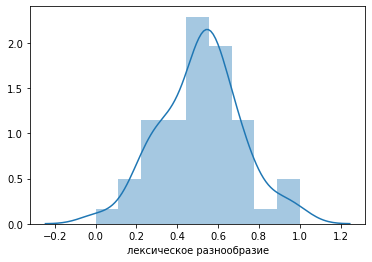

In [23]:
print(shapiro(sperantov_data['частотность']))
print(shapiro(sperantov_data['протяженность']))
print(shapiro(sperantov_data['внутристиховые ремарки']))
print(shapiro(sperantov_data['характерологические ремарки']))
print(shapiro(sperantov_data['лексическое разнообразие']))
sns.distplot(sperantov_data['лексическое разнообразие'])
plt.show()

## Reduce Dimensionality with PCA

In [24]:
pca = PCA(n_components=1)

Since we want to follow Sperantov as closely as we can, we will exclude 'лексическое разнообразие' like he did as it can be influenced by a confounding influence of language evolution.

In [25]:
sperantov_data.drop('лексическое разнообразие', axis=1, inplace=True)

In [26]:
pca_transformed = pca.fit_transform(sperantov_data.iloc[:, 3:-3])

In [27]:
pca_transformed.shape

(55, 1)

In [28]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.71951969]
0.7195196937862235


In [29]:
sperantov_data['pca_component_1'] = pca_transformed

In [30]:
sperantov_data.head(3)

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1
0,Conservative Neoclassicism,"Сумароков, «Хорев», 1747",5,0.056589,0.229167,0.052811,0.000000,Сумароков,«Хорев»,1747,-0.267524
2,Conservative Neoclassicism,"Сумароков, «Синав и Трувор», 1750",5,0.122070,0.076389,0.085179,0.124303,Сумароков,«Синав и Трувор»,1750,-0.202824
3,Conservative Neoclassicism,"Сумароков, «Аргистона», 1750",5,0.057397,0.243056,0.011925,0.104781,Сумароков,«Аргистона»,1750,-0.219528


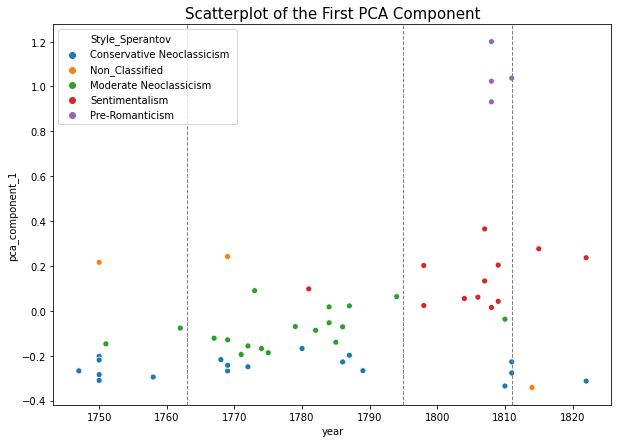

In [31]:
plt.figure(figsize=(10, 7))
plt.title('Scatterplot of the First PCA Component', fontsize=15)
sns.scatterplot(x='year', y='pca_component_1', data=sperantov_data, hue='Style_Sperantov')
period_one = plt.axvline(1763, color='grey',linestyle='dashed', linewidth=1)
period_two = plt.axvline(1795, color='grey',linestyle='dashed', linewidth=1)
period_three = plt.axvline(1811, color='grey',linestyle='dashed', linewidth=1)
plt.show()

In [32]:
shapiro(sperantov_data['pca_component_1'])

(0.7616249322891235, 4.524096297586766e-08)

In [33]:
period_one = sperantov_data[(sperantov_data.year>=1747)&(sperantov_data.year<=1762)]
period_two = sperantov_data[(sperantov_data.year>=1763)&(sperantov_data.year<=1794)]
period_three = sperantov_data[(sperantov_data.year>=1795)&(sperantov_data.year<=1810)]
period_four = sperantov_data[(sperantov_data.year>=1811)&(sperantov_data.year<=1822)]

## Identify and Remove Outliers

We will identify outliers using the following method: a datapoint that is 2 standard deviations away from the mean will be considered an outlier.

## Outliers for Period One

In [34]:
upper_boundary = period_one['pca_component_1'].mean() + 2*period_one['pca_component_1'].std()
lower_boundary = period_one['pca_component_1'].mean() - 2*period_one['pca_component_1'].std()

In [35]:
display(period_one[period_one['pca_component_1']>=upper_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1
5,Non_Classified,"Тредиаковский, «Деидамия», 1750",5,0.228375,0.569444,0.155026,0.368127,Тредиаковский,«Деидамия»,1750,0.215979


In [36]:
display(period_one[period_one['pca_component_1']<=lower_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1


period_one = period_one[period_one.tragedy_title!='«Деидамия»']

In [37]:
print(period_one.shape)

(9, 11)


## Outliers for Period Two

In [38]:
upper_boundary = period_two['pca_component_1'].mean() + 2*period_two['pca_component_1'].std()
lower_boundary = period_two['pca_component_1'].mean() - 2*period_two['pca_component_1'].std()

In [39]:
display(period_two[period_two['pca_component_1']>=upper_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1
15,Non_Classified,"Ржевский, «Подложный Смердий», 1769",5,0.304365,0.756944,0.158433,0.242629,Ржевский,«Подложный Смердий»,1769,0.242164


In [40]:
display(period_two[period_two['pca_component_1']<=lower_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1


period_two = period_two[period_two.tragedy_title!='«Подложный Смердий»']

In [41]:
print(period_two.shape)

(25, 11)


## Outliers for Period Three

In [42]:
upper_boundary = period_three['pca_component_1'].mean() + 2*period_three['pca_component_1'].std()
lower_boundary = period_three['pca_component_1'].mean() - 2*period_three['pca_component_1'].std()

In [43]:
display(period_three[period_three['pca_component_1']>=upper_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1
50,Pre-Romanticism,"Державин, «Ирод и Мариамна», 1808",5,0.595392,0.50463,1.0,1.0,Державин,«Ирод и Мариамна»,1808,1.200141


In [44]:
display(period_three[period_three['pca_component_1']<=lower_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1


In [45]:
period_three['pca_component_1'].mean() + 2*period_three['pca_component_1'].std()

1.17774441295816

period_three = period_three[period_three.tragedy_title!='«Ирод и Мариамна»']

In [46]:
print(period_three.shape)

(14, 11)


## Outliers for Period Four

In [47]:
upper_boundary = period_four['pca_component_1'].mean() + 2*period_four['pca_component_1'].std()
lower_boundary = period_four['pca_component_1'].mean() - 2*period_four['pca_component_1'].std()

In [48]:
display(period_four[period_four['pca_component_1']>=upper_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1


In [49]:
display(period_four[period_four['pca_component_1']<=lower_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1


### Statistical Tests

In [50]:
print(period_four.shape)

(7, 11)


In [51]:
kruskal(period_one['частотность'], 
        period_two['частотность'], 
        period_three['частотность'], 
        period_four['частотность'])

KruskalResult(statistic=14.238194881098437, pvalue=0.0025982209606847154)

In [52]:
kruskal(period_one['протяженность'], 
        period_two['протяженность'], 
        period_three['протяженность'], 
        period_four['протяженность'])

KruskalResult(statistic=12.772880181837879, pvalue=0.0051544177606406266)

In [53]:
kruskal(period_one['внутристиховые ремарки'], 
        period_two['внутристиховые ремарки'], 
        period_three['внутристиховые ремарки'], 
        period_four['внутристиховые ремарки'])

KruskalResult(statistic=10.875941786912882, pvalue=0.012415972480859532)

In [54]:
kruskal(period_one['характерологические ремарки'], 
        period_two['характерологические ремарки'], 
        period_three['характерологические ремарки'], 
        period_four['характерологические ремарки'])

KruskalResult(statistic=7.078180938354751, pvalue=0.0694471897008062)

In [55]:
kruskal(period_one['pca_component_1'], 
        period_two['pca_component_1'], 
        period_three['pca_component_1'], 
        period_four['pca_component_1'])

KruskalResult(statistic=13.50824860853433, pvalue=0.0036570018382477256)

In [56]:
def small_sample_wilcoxon_rank_sum(series_one, series_two):
    values_one = series_one.sort_values().tolist()
    values_two = series_two.sort_values().tolist()
    # make sure there are no ties  - this function only works for no ties
    result_df = pd.DataFrame(values_one + values_two, columns=['combined']).sort_values(by='combined')
    # average for ties
    result_df['ranks'] = result_df['combined'].rank(method='average')
    # make a dictionary where keys are values and values are ranks
    val_to_rank = dict(zip(result_df['combined'].values, result_df['ranks'].values))
    if len(values_one) < len(values_two):
        smaller_sample = values_one
    else:
        smaller_sample = values_two
    test_statistic = np.sum([val_to_rank[num] for num in smaller_sample])
    
    return test_statistic

In [57]:
period_one.shape[0]

9

In [58]:
period_two.shape[0]

25

Wlower = 107 or Wupper = 208

In [59]:
print(small_sample_wilcoxon_rank_sum(period_one['частотность'], period_two['частотность']))
print(small_sample_wilcoxon_rank_sum(period_one['протяженность'], period_two['протяженность']))
print(small_sample_wilcoxon_rank_sum(period_one['внутристиховые ремарки'], period_two['внутристиховые ремарки']))
print(small_sample_wilcoxon_rank_sum(period_one['характерологические ремарки'], period_two['характерологические ремарки']))

103.0
164.0
146.5
125.0


In [60]:
print(kruskal(period_one['частотность'], period_two['частотность']))
print(kruskal(period_one['протяженность'], period_two['протяженность']))
print(kruskal(period_one['внутристиховые ремарки'], period_two['внутристиховые ремарки']))
print(kruskal(period_one['характерологические ремарки'], period_two['характерологические ремарки']))

KruskalResult(statistic=4.5267868785656065, pvalue=0.03336821235348459)
KruskalResult(statistic=0.06439079054605287, pvalue=0.7996860727874971)
KruskalResult(statistic=0.18449370636499002, pvalue=0.6675395267976757)
KruskalResult(statistic=1.6655072463768241, pvalue=0.1968613839886244)


In [46]:
from scipy.stats import ttest_ind
print(ttest_ind(period_one['частотность'], period_two['частотность']))
print(ttest_ind(period_one['протяженность'], period_two['протяженность']))
print(ttest_ind(period_one['внутристиховые ремарки'], period_two['внутристиховые ремарки']))
print(ttest_ind(period_one['характерологические ремарки'], period_two['характерологические ремарки']))

Ttest_indResult(statistic=-1.960819045998924, pvalue=0.058653046960733056)
Ttest_indResult(statistic=-0.01721158136283153, pvalue=0.9863746913310406)
Ttest_indResult(statistic=-0.7448745992686272, pvalue=0.46178345329172754)
Ttest_indResult(statistic=-1.1274021450771583, pvalue=0.2679553731831284)


In [56]:
print(mannwhitneyu(period_one['частотность'], 
                   period_two['частотность']))
print(mannwhitneyu(period_one['протяженность'], 
                   period_two['протяженность']))
print(mannwhitneyu(period_one['внутристиховые ремарки'], 
                   period_two['внутристиховые ремарки']))
print(mannwhitneyu(period_one['характерологические ремарки'], 
                   period_two['характерологические ремарки']))
print(mannwhitneyu(period_one['pca_component_1'], 
                   period_two['pca_component_1']))

MannwhitneyuResult(statistic=58.0, pvalue=0.0175109449140325)
MannwhitneyuResult(statistic=106.0, pvalue=0.407401694500457)
MannwhitneyuResult(statistic=101.5, pvalue=0.340901749718317)
MannwhitneyuResult(statistic=80.0, pvalue=0.1019193374792905)
MannwhitneyuResult(statistic=64.0, pvalue=0.03048395264934224)


In [68]:
period_two.shape

(25, 11)

In [69]:
period_three.shape

(14, 11)

Wlower = 185 or Wupper =309

In [49]:
print(small_sample_wilcoxon_rank_sum(period_two['частотность'], period_three['частотность']))
print(small_sample_wilcoxon_rank_sum(period_two['протяженность'], period_three['протяженность']))
print(small_sample_wilcoxon_rank_sum(period_two['внутристиховые ремарки'], period_three['внутристиховые ремарки']))
print(small_sample_wilcoxon_rank_sum(period_two['характерологические ремарки'], period_three['характерологические ремарки']))

379.0
403.0
385.0
346.0


In [50]:
print(ttest_ind(period_two['частотность'], period_three['частотность']))
print(ttest_ind(period_two['протяженность'], period_three['протяженность']))
print(ttest_ind(period_two['внутристиховые ремарки'], period_three['внутристиховые ремарки']))
print(ttest_ind(period_two['характерологические ремарки'], period_three['характерологические ремарки']))

Ttest_indResult(statistic=-3.271027537068325, pvalue=0.0023233354668455645)
Ttest_indResult(statistic=-4.0917814599107185, pvalue=0.0002223465755944349)
Ttest_indResult(statistic=-3.6141656968502773, pvalue=0.0008914055526234508)
Ttest_indResult(statistic=-2.6866055302714713, pvalue=0.010747360324283833)


In [62]:
print(mannwhitneyu(period_two['частотность'], period_three['частотность']))
print(mannwhitneyu(period_two['протяженность'], period_three['протяженность']))
print(mannwhitneyu(period_two['внутристиховые ремарки'], period_three['внутристиховые ремарки']))
print(mannwhitneyu(period_two['характерологические ремарки'], period_three['характерологические ремарки']))

MannwhitneyuResult(statistic=76.0, pvalue=0.0019637260612188926)
MannwhitneyuResult(statistic=52.0, pvalue=0.00016726665852288548)
MannwhitneyuResult(statistic=70.0, pvalue=0.001104724002909904)
MannwhitneyuResult(statistic=109.0, pvalue=0.027233653685947535)


In [ ]:
print(mannwhitneyu(period_three['частотность'], 
                   period_four['частотность']))
print(mannwhitneyu(period_three['протяженность'], 
                   period_four['протяженность']))
print(mannwhitneyu(period_three['внутристиховые ремарки'], 
                   period_four['внутристиховые ремарки']))
print(mannwhitneyu(period_three['характерологические ремарки'], 
                   period_four['характерологические ремарки']))
print(mannwhitneyu(period_three['pca_component_1'], 
                   period_four['pca_component_1']))

In [98]:
print(period_three.shape[0])

14


In [99]:
print(period_four.shape[0])

7


Wlower = 50 or Wupper = 104

In [97]:
print(small_sample_wilcoxon_rank_sum(period_three['частотность'], period_four['частотность']))
print(small_sample_wilcoxon_rank_sum(period_three['протяженность'], period_four['протяженность']))
print(small_sample_wilcoxon_rank_sum(period_three['внутристиховые ремарки'], period_four['внутристиховые ремарки']))
print(small_sample_wilcoxon_rank_sum(period_three['характерологические ремарки'], period_four['характерологические ремарки']))

58.0
61.0
57.0
60.5


In [ ]:
print(small_sample_wilcoxon_rank_sum(period_three['частотность'], period_four['частотность']))
print(small_sample_wilcoxon_rank_sum(period_three['протяженность'], period_four['протяженность']))
print(small_sample_wilcoxon_rank_sum(period_three['внутристиховые ремарки'], period_four['внутристиховые ремарки']))
print(small_sample_wilcoxon_rank_sum(period_three['характерологические ремарки'], period_four['характерологические ремарки']))

In [48]:
print(ttest_ind(period_three['частотность'], period_four['частотность']))
print(ttest_ind(period_three['протяженность'], period_four['протяженность']))
print(ttest_ind(period_three['внутристиховые ремарки'], period_four['внутристиховые ремарки']))
print(ttest_ind(period_three['характерологические ремарки'], period_four['характерологические ремарки']))

Ttest_indResult(statistic=0.42764464989384643, pvalue=0.67371758396122)
Ttest_indResult(statistic=0.8958060477676802, pvalue=0.38156574426905454)
Ttest_indResult(statistic=1.1237016387361738, pvalue=0.27513749266384635)
Ttest_indResult(statistic=0.9224589955061231, pvalue=0.36785556534765373)


In [71]:
import re
regex_pattern = '[А-Я+Ѣ+І]+.\w[А-Я+Ѣ+І]+.\w[А-Я+Ѣ+І]+\w[А-Я+Ѣ+І]|[А-Я+Ѣ+І]+.\w[А-Я+Ѣ+І]+ [А-Я+Ѣ+І] |[А-Я+Ѣ+І]+.\w[А-Я+Ѣ+І]+.\w[А-Я+Ѣ+І]+|[А-Я+Ѣ+І]+.\w[А-Я+Ѣ+І]+|[А-Я+Ѣ+І]+.\w[А-Я+Ѣ+І]+ [А-Я+Ѣ+І]'

In [72]:
scene_itself = """АЛѢКСЪ"""

In [73]:
[name.group().strip() for name in re.finditer(regex_pattern, scene_itself)]

['АЛѢКСЪ']

In [76]:
from bs4 import BeautifulSoup as bs
st = """<docDate value='1682'>M. DC. LXXXII.</docDate>"""

In [78]:
bs(st).find('docdate')['value']

'1682'